# COVID Severity Prediction

## Import Packages and Read Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [0]:
df = pd.read_csv('covid_sym.csv')
df.head()
# https://raw.githubusercontent.com/elisabethgwebb/COVID/master/covid_sym.csv

,age,age_0-9,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80+,background_diseases_binary,city,confirmed_date,country,date_onset_symptoms,region,severity_illness,severity_level,sex,symptoms,no_symptom,diarrhea,myalgia,fever,respiratory infection,cough,fatigue,hypoxia,weakness,chills,septic shock,respiratory failure,sepsis,pneumonia,breathing difficulty,treatment,treatment_binary
0,35,0,0,0,1,0,0,0,0,0,1,Snohomish County,43850.0,united states,43846.0,Washington,NaN,FALSE,male,cough fever nausea,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,NaN,0
1,35,0,0,0,1,0,0,0,0,0,1,Snohomish County,43850.0,united states,43846.0,Washington,NaN,FALSE,male,cough fever nausea,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,NaN,0
2,62,0,0,0,0,0,0,1,0,0,1,"Cainta, Rizal",43895.0,philippines,43886.0,NaN,deceased,4,male,pneumonia breathing difficulty cough,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,hospital,1
3,59,0,0,0,0,0,1,0,0,0,1,"Cainta, Rizal",43896.0,philippines,43888.0,NaN,deceased,4,female,cough pneumonia breathing difficulty,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,hospital,1
4,86,0,0,0,0,0,0,0,0,1,1,Marikina City,43898.0,philippines,43891.0,NaN,deceased,4,male,breathing difficulty organ failure pneumonia r...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,hospital,1


## EDA

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1415 non-null   object 
 1   age_0-9                     1490 non-null   int64  
 2   age_10-19                   1490 non-null   int64  
 3   age_20-29                   1490 non-null   int64  
 4   age_30-39                   1490 non-null   int64  
 5   age_40-49                   1490 non-null   int64  
 6   age_50-59                   1490 non-null   int64  
 7   age_60-69                   1490 non-null   int64  
 8   age_70-79                   1490 non-null   int64  
 9   age_80+                     1490 non-null   int64  
 10  background_diseases_binary  1490 non-null   int64  
 11  city                        1182 non-null   object 
 12  confirmed_date              1449 non-null   float64
 13  country                     1460 

In [0]:
df['severity_level'].value_counts()

FALSE    1197
4         180
2          66
0          37
1           8
3           2
Name: severity_level, dtype: int64

In [0]:
df['severity_level'].value_counts() / len(df)

FALSE    0.803356
4        0.120805
2        0.044295
0        0.024832
1        0.005369
3        0.001342
Name: severity_level, dtype: float64

In [0]:
df['background_diseases_binary'].value_counts()

0    1318
1     172
Name: background_diseases_binary, dtype: int64

In [0]:
df['treatment_binary'].value_counts()

0    1434
1      56
Name: treatment_binary, dtype: int64

## Preprocessing

In [0]:
df.columns

Index(['age', 'age_0-9', 'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
       'age_50-59', 'age_60-69', 'age_70-79', 'age_80+',
       'background_diseases_binary', 'city', 'confirmed_date', 'country',
       'date_onset_symptoms', 'region', 'severity_illness', 'severity_level',
       'sex', 'symptoms', 'no_symptom', 'diarrhea', 'myalgia ', 'fever',
       'respiratory infection', 'cough ', 'fatigue', 'hypoxia', 'weakness',
       'chills', 'septic shock', 'respiratory failure', 'sepsis', 'pneumonia',
       'breathing difficulty', 'treatment', 'treatment_binary'],
      dtype='object')

In [0]:
col_needed = ['no_symptom','diarrhea', 'myalgia ', 'fever', 'respiratory infection', 'cough ',
       'fatigue', 'hypoxia', 'weakness', 'chills', 'septic shock',
       'respiratory failure', 'sepsis', 'pneumonia', 'breathing difficulty',
       'treatment_binary', 'background_diseases_binary', 'age_0-9', 'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
       'age_50-59', 'age_60-69', 'age_70-79', 'sex', 'severity_level']
dfv2 = df[col_needed]

In [0]:
dfv2 = pd.get_dummies(dfv2, columns=['sex'], drop_first=True)

In [0]:
combined_level = []
for val in dfv2['severity_level']:
  if val == '0':
    combined_level.append('0')
  elif val == '1':
    combined_level.append('0')
  elif val == '2':
    combined_level.append('0')
  elif val == '3': 
    combined_level.append('1')
  elif val == '4': 
    combined_level.append('1')
  else: combined_level.append('unknown')

In [0]:
dfv2['combined_level'] = combined_level

In [0]:
dfv2['combined_level'].value_counts()

unknown    1197
1           182
0           111
Name: combined_level, dtype: int64

In [0]:
dfv3 = dfv2.loc[dfv2['combined_level']!='unknown',:].reset_index().drop('index',axis=1)

## Model Building

In [0]:
X = dfv3.drop(['severity_level', 'combined_level'],axis=1)
y = dfv3.loc[:,'combined_level'].astype('int')

In [0]:
y.value_counts()

1    182
0    111
Name: combined_level, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

In [0]:
lr = LogisticRegression(random_state=42)

In [0]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.845360824742268

In [0]:
confusion_matrix(y_test, y_pred)

array([[33,  6],
       [ 9, 49]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.89      0.84      0.87        58

    accuracy                           0.85        97
   macro avg       0.84      0.85      0.84        97
weighted avg       0.85      0.85      0.85        97



In [0]:
stand_coef = np.std(X_train,0)*lr.coef_[0]
print(stand_coef)

no_symptom                   -0.686553
diarrhea                      0.001292
myalgia                       0.071971
fever                        -0.123840
respiratory infection         0.122918
cough                        -0.078204
fatigue                       0.004880
hypoxia                       0.002261
weakness                     -0.000104
chills                        0.034157
septic shock                  0.192602
respiratory failure           0.265483
sepsis                        0.010714
pneumonia                     0.743636
breathing difficulty          0.421806
treatment_binary              0.107431
background_diseases_binary    0.847689
age_0-9                      -0.223251
age_10-19                    -0.050751
age_20-29                    -0.261729
age_30-39                    -0.230421
age_40-49                    -0.347541
age_50-59                    -0.147969
age_60-69                     0.225356
age_70-79                     0.174316
sex_male                 

In [0]:
sort_coef = stand_coef.sort_values()

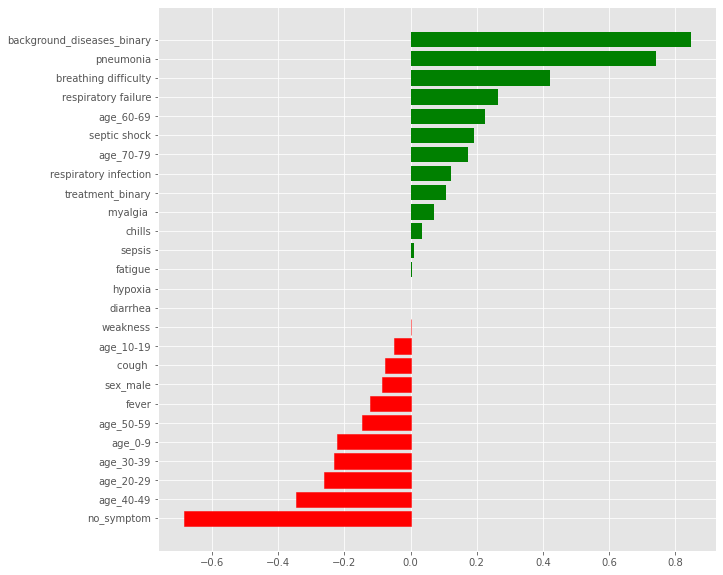

In [0]:
plt.figure(figsize=(10,10))
barlist = plt.barh(sort_coef.index,sort_coef,color='g')
for i,coef in enumerate(sort_coef.values):
    if coef<0:
        barlist[i].set_color('r')
    else: pass

### Random Forest

In [0]:
rf = RandomForestClassifier(random_state=42)

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8762886597938144

In [0]:
confusion_matrix(y_test, y_pred)

array([[33,  6],
       [ 6, 52]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.90      0.90      0.90        58

    accuracy                           0.88        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.88      0.88      0.88        97



#### Feature Importance

<BarContainer object of 26 artists>

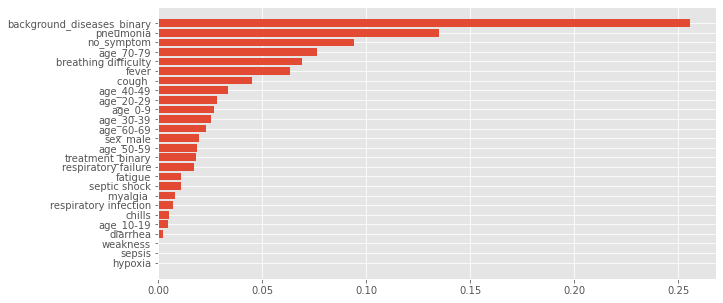

In [0]:
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[rf.feature_importances_.argsort()],np.sort(rf.feature_importances_))

### Algorithms Comparison

In [0]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel = 'rbf',random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [0]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, X_test, y_test):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)), columns = ['classifier', 'accuracy'])
    count = 0
    for key, classifier in dict_classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        train_score = accuracy_score(y_test, y_pred)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'accuracy'] = train_score
        count+=1
    return df_results

In [0]:
# Random Forest is our best model
batch_classify(X_train, y_train, X_test, y_test)

,classifier,accuracy
0,Logistic Regression,0.845361
1,Nearest Neighbors,0.865979
2,Support Vector Machine,0.865979
3,Gradient Boosting Classifier,0.855670
4,Decision Tree,0.804124
5,Random Forest,0.876289
6,Naive Bayes,0.721649


### Cluster (KMeans)

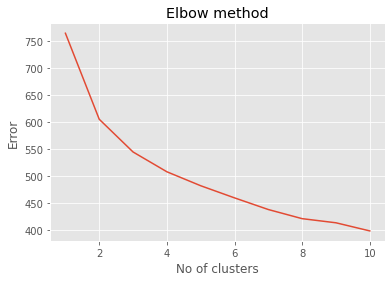

In [0]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [0]:
kmean = KMeans(n_clusters=2).fit(X_train)

In [0]:
y_kmeans = kmean.fit_predict(X_test)

In [0]:
reversed_y_kmeans=[]
for i in y_kmeans:
  if i == 1:
    reversed_y_kmeans.append(0)
  else: reversed_y_kmeans.append(1)

In [0]:
kmeanScore = accuracy_score(y_test, reversed_y_kmeans)

0.7319587628865979

In [0]:
kmeandf = pd.DataFrame({'classifier':'KMeans','accuracy':kmeanScore},index=[7])

In [0]:
# SVM is still our best model
pd.concat([batch_classify(X_train, y_train, X_test, y_test), kmeandf])

,classifier,accuracy
0,Logistic Regression,0.835052
1,Nearest Neighbors,0.783505
2,Support Vector Machine,0.855670
3,Gradient Boosting Classifier,0.804124
4,Decision Tree,0.752577
5,Random Forest,0.793814
6,Naive Bayes,0.742268
7,KMeans,0.690722


## Model Tuning

In [0]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [0]:
randoms = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
randoms.fit(X_train,y_train)

In [0]:
# print best parameter after tuning 
print(randoms.best_params_) 
# It's the default parameter of SVM

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [0]:
y_pred = randoms.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8762886597938144

In [0]:
confusion_matrix(y_test, y_pred)

array([[33,  6],
       [ 6, 52]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.90      0.90      0.90        58

    accuracy                           0.88        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.88      0.88      0.88        97



In [0]:
y_score = randoms.predict_proba(X_test)[:,1]

In [0]:
roc_auc_score(y_test, y_score)

0.9129089301503095

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_score)

Text(0, 0.5, 'True Positive Rate')

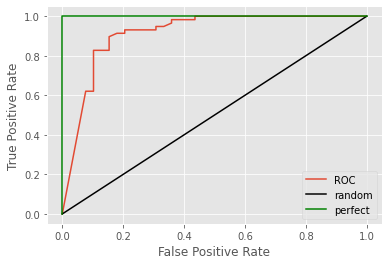

In [0]:
plt.plot(fpr, tpr,label = 'ROC')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Multi SVM (Just in case we decide to use in the future)

In [0]:
X = dfv3.drop(['combined_level','severity_level'], axis=1)
y = dfv3['severity_level']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_mult = rf.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred_mult)

0.6082474226804123

In [0]:
svm = SVC()

In [0]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_mult = svm.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred_mult)

0.6597938144329897

In [0]:
confusion_matrix(y_test, y_pred_mult)

array([[ 2,  0,  8,  0,  4],
       [ 0,  0,  1,  0,  2],
       [ 5,  0, 12,  0,  5],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  7,  0, 50]])

The codes are still raw. DON'T RUN

In [0]:
lb = LabelBinarizer()
y_lb = lb.fit_transform(y)
# yp_lb = lb.transform(y_pred)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lb, test_size=0.3, random_state=42)

In [0]:
classifier = OneVsRestClassifier(SVC(kernel='linear',
                                 random_state=42))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [0]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 4,  4,  4],
       [10, 10,  2],
       [ 6,  3, 45]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.59      0.45      0.51        22
           2       0.88      0.83      0.86        54

   micro avg       0.76      0.64      0.69        88
   macro avg       0.55      0.46      0.49        88
weighted avg       0.71      0.64      0.67        88
 samples avg       0.64      0.64      0.64        88



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
roc_auc_score(y_test, y_score)

0.7600704187479447